In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_df = pd.read_excel('RESULTS_MATH_161.xlsx')
results_df.head()

,First name,Last name,ID number,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
0,David Kwadwo Frimpong,ABABIO,21098429,5.0,3.0,8.0,7.0,16.0,39,16.714286
1,Wendy Atampoka,ABAGNA,21102596,7.0,5.0,8.0,NaN,7.0,27,11.571429
2,Joshua,ABAKAH,21108632,7.0,8.0,9.0,10.0,9.0,43,18.428571
3,Samuel Kwaku,ABANKWA,21108576,6.0,8.0,8.0,6.0,14.0,42,18.000000
4,Joseph,ABBAN,21163755,9.0,5.0,8.0,7.0,17.0,46,19.714286


In [3]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   First name  669 non-null    object 
 1   Last name   669 non-null    object 
 2   ID number   669 non-null    int64  
 3   Q1_10       558 non-null    float64
 4   Q2_10       621 non-null    float64
 5   Q3_10       619 non-null    float64
 6   Q4_10       586 non-null    float64
 7   MS_30       661 non-null    float64
 8   T_70        669 non-null    int64  
 9   CA_30       669 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 52.4+ KB


In [4]:
results_df = results_df.set_index('ID number')
results_df.describe()

,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
count,558.000000,621.000000,619.000000,586.000000,661.000000,669.000000,669.000000
mean,6.075269,5.333333,6.316640,6.982935,13.544629,35.361734,15.155029
std,2.115531,2.293047,1.659502,2.356235,5.579173,10.517341,4.507432
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5.000000,3.000000,5.000000,6.000000,9.000000,29.000000,12.428571
50%,6.000000,5.000000,7.000000,7.000000,13.000000,36.000000,15.428571
75%,8.000000,7.000000,8.000000,9.000000,17.000000,43.000000,18.428571
max,10.000000,10.000000,10.000000,10.000000,29.000000,61.000000,26.142857


In [5]:
results_df.isnull().sum().sort_values(ascending=False)

Q1_10         111
Q4_10          83
Q3_10          50
Q2_10          48
MS_30           8
First name      0
Last name       0
T_70            0
CA_30           0
dtype: int64

In [6]:
tests = ['Q1_10', 'Q2_10', 'Q3_10', 'Q4_10', 'MS_30', 'T_70', 'CA_30']
outliers = {}

for col in tests:
    Q1 = results_df[col].quantile(0.25)
    Q3 = results_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    outliers[col] = results_df[(results_df[col] < lower) | (results_df[col] > upper)]

In [7]:
outliers['Q1_10']

,First name,Last name,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
ID number,,,,,,,,,
21114429,Aaron Offei,DARKO,0.0,NaN,8.0,2.0,13.0,23,9.857143
21128414,Benedict Kwame,KARIKARI,0.0,5.0,7.0,9.0,13.0,34,14.571429
21136038,Herman Nayram,LUMOR,0.0,5.0,5.0,9.0,13.0,32,13.714286
21075010,Shedal,MOHAMMED,0.0,5.0,7.0,7.0,6.0,25,10.714286
21183678,Abdul Malik,RAZAK,0.0,7.0,6.0,NaN,17.0,30,12.857143


In [8]:
outliers['Q2_10']

,First name,Last name,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
ID number,,,,,,,,,


In [9]:
outliers['Q3_10']

,First name,Last name,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
ID number,,,,,,,,,
21169894,Kwadwo Acheampong,BOATENG,6.0,1.0,0.0,2.0,13.0,22,9.428571


In [10]:
outliers['Q4_10']

,First name,Last name,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
ID number,,,,,,,,,
21167281,Davis Cadwell,ADJEI,9.0,5.0,8.0,0.0,14.0,36,15.428571
21100257,Douglas,ADJEI,5.0,7.0,8.0,0.0,10.0,30,12.857143
21090783,Michael,AFFUM,6.0,2.0,1.0,0.0,14.0,23,9.857143
21184405,Emmanuel Obeng,AGYAPONG,NaN,2.0,1.0,0.0,5.0,8,3.428571
21072177,Benjamin Adotey,ALLOTEY,5.0,7.0,5.0,0.0,11.0,28,12.000000
21183885,Gideon,ANAMAN,3.0,1.0,2.0,1.0,7.0,14,6.000000
21138722,Lawrence Mawuli,AYIM,5.0,5.0,5.0,1.0,19.0,35,15.000000
21146527,Orleans Kojo,BARNES,9.0,5.0,5.0,1.0,23.0,43,18.428571
21082041,Nana Owusu,BOATENG,8.0,2.0,1.0,1.0,15.0,27,11.571429


In [11]:
outliers['MS_30']

,First name,Last name,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
ID number,,,,,,,,,


In [12]:
outliers['T_70']

,First name,Last name,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
ID number,,,,,,,,,
20763265,Kassim,ABDULAI,NaN,NaN,NaN,NaN,NaN,0,0.000000
21017923,Emmanuel Nsorbila,ADOMBIRE,NaN,NaN,NaN,NaN,NaN,0,0.000000
21079415,Caroline Aba,AIDOO,NaN,NaN,NaN,NaN,NaN,0,0.000000
21019205,Denzel Boateng,ASANTE,NaN,NaN,NaN,NaN,4.0,4,1.714286
21085320,Annabel,NTOSO,NaN,NaN,NaN,NaN,4.0,4,1.714286
21101945,Emmanuel,OSEI,NaN,NaN,NaN,NaN,NaN,0,0.000000
21137713,Keren Boadiwaa,PUMPUNI,7.0,NaN,NaN,NaN,NaN,7,3.000000
21105482,Selma,TAMIMU,6.0,NaN,NaN,NaN,NaN,6,2.571429


In [13]:
results_df = results_df.drop(columns=['First name', 'Last name'])

In [14]:
results_df.head()

,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
ID number,,,,,,,
21098429,5.0,3.0,8.0,7.0,16.0,39,16.714286
21102596,7.0,5.0,8.0,NaN,7.0,27,11.571429
21108632,7.0,8.0,9.0,10.0,9.0,43,18.428571
21108576,6.0,8.0,8.0,6.0,14.0,42,18.000000
21163755,9.0,5.0,8.0,7.0,17.0,46,19.714286


In [15]:
results_df = results_df.reset_index(drop=True)

In [16]:
results_df.head()

,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30
0,5.0,3.0,8.0,7.0,16.0,39,16.714286
1,7.0,5.0,8.0,NaN,7.0,27,11.571429
2,7.0,8.0,9.0,10.0,9.0,43,18.428571
3,6.0,8.0,8.0,6.0,14.0,42,18.000000
4,9.0,5.0,8.0,7.0,17.0,46,19.714286


In [17]:
results_df[['Q1_10', 'Q2_10', 'Q3_10', 'Q4_10', 'MS_30']].mean()

Q1_10     6.075269
Q2_10     5.333333
Q3_10     6.316640
Q4_10     6.982935
MS_30    13.544629
dtype: float64

In [18]:
results_df[['Q1_10', 'Q2_10', 'Q3_10', 'Q4_10', 'MS_30']].std()

Q1_10    2.115531
Q2_10    2.293047
Q3_10    1.659502
Q4_10    2.356235
MS_30    5.579173
dtype: float64

In [19]:
results_df[['Q1_10', 'Q2_10', 'Q3_10', 'Q4_10', 'MS_30', 'T_70']].corr()

,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70
Q1_10,1.000000,0.165096,0.073362,0.085866,0.252868,0.491152
Q2_10,0.165096,1.000000,0.215987,0.125026,0.089082,0.426499
Q3_10,0.073362,0.215987,1.000000,0.215137,0.089893,0.393066
Q4_10,0.085866,0.125026,0.215137,1.000000,0.037826,0.380897
MS_30,0.252868,0.089082,0.089893,0.037826,1.000000,0.738073
T_70,0.491152,0.426499,0.393066,0.380897,0.738073,1.000000


In [20]:
results_df.corr()['T_70'].sort_values(ascending=False)

T_70     1.000000
CA_30    1.000000
MS_30    0.738073
Q1_10    0.491152
Q2_10    0.426499
Q3_10    0.393066
Q4_10    0.380897
Name: T_70, dtype: float64

In [21]:
results_df['Quiz_avg'] = results_df[['Q1_10', 'Q2_10', 'Q3_10', 'Q4_10']].mean(axis=1)

In [22]:
results_df[['Quiz_avg','MS_30', 'T_70']].corr()

,Quiz_avg,MS_30,T_70
Quiz_avg,1.000000,0.188252,0.640060
MS_30,0.188252,1.000000,0.738073
T_70,0.640060,0.738073,1.000000


In [23]:
results_df.sample(5)

,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30,Quiz_avg
243,7.0,6.0,6.0,8.0,21.0,48,20.571429,6.75
253,8.0,4.0,7.0,2.0,4.0,25,10.714286,5.25
55,2.0,4.0,8.0,6.0,8.0,28,12.000000,5.00
479,NaN,5.0,2.0,NaN,5.0,12,5.142857,3.50
622,5.0,3.0,6.0,4.0,10.0,28,12.000000,4.50


In [24]:
results_df['Performance_Level'] = pd.cut(results_df['T_70'], bins=[0, 35, 55, 70], labels=['Low', 'Average', 'High'], include_lowest=True)

In [25]:
results_df.groupby('Performance_Level')[['Q1_10', 'Q2_10', 'Q3_10', 'Q4_10', 'MS_30', 'T_70']].mean()

C:\Users\konad\AppData\Local\Temp\ipykernel_3200\3489381058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_df.groupby('Performance_Level')[['Q1_10', 'Q2_10', 'Q3_10', 'Q4_10', 'MS_30', 'T_70']].mean()


,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70
Performance_Level,,,,,,
Low,5.004292,4.448763,5.782456,6.194332,9.870662,26.867692
Average,6.756410,6.012308,6.750779,7.503067,16.613293,42.821752
High,8.923077,7.615385,7.307692,8.923077,25.000000,57.769231


In [26]:
results_df.groupby('Performance_Level')[['Quiz_avg', 'MS_30', 'T_70']].mean()

C:\Users\konad\AppData\Local\Temp\ipykernel_3200\447981804.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_df.groupby('Performance_Level')[['Quiz_avg', 'MS_30', 'T_70']].mean()


,Quiz_avg,MS_30,T_70
Performance_Level,,,
Low,5.374868,9.870662,26.867692
Average,6.759567,16.613293,42.821752
High,8.192308,25.000000,57.769231


In [27]:
results_df[(results_df['Q1_10'] < 5) & (results_df['T_70'] >= 50) ]

,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30,Quiz_avg,Performance_Level


In [28]:
results_df[(results_df['Q1_10'] < 5) & (results_df['T_70'] >= 40) ]

,Q1_10,Q2_10,Q3_10,Q4_10,MS_30,T_70,CA_30,Quiz_avg,Performance_Level
13,4.0,7.0,6.0,7.0,16.0,40,17.142857,6.000000,Average
35,3.0,8.0,8.0,8.0,16.0,43,18.428571,6.750000,Average
93,4.0,5.0,7.0,7.0,23.0,46,19.714286,5.750000,Average
137,1.0,9.0,6.0,10.0,16.0,42,18.000000,6.500000,Average
176,4.0,9.0,8.0,4.0,22.0,47,20.142857,6.250000,Average
186,3.0,9.0,8.0,4.0,17.0,41,17.571429,6.000000,Average
227,4.0,8.0,8.0,10.0,13.0,43,18.428571,7.500000,Average
232,4.0,7.0,7.0,8.0,14.0,40,17.142857,6.500000,Average
242,4.0,7.0,8.0,8.0,13.0,40,17.142857,6.750000,Average
346,4.0,7.0,7.0,9.0,18.0,45,19.285714,6.750000,Average


In [29]:
results_df[(results_df['Q1_10'] < 5) & (results_df['T_70'] >= 40) ].shape

(20, 9)

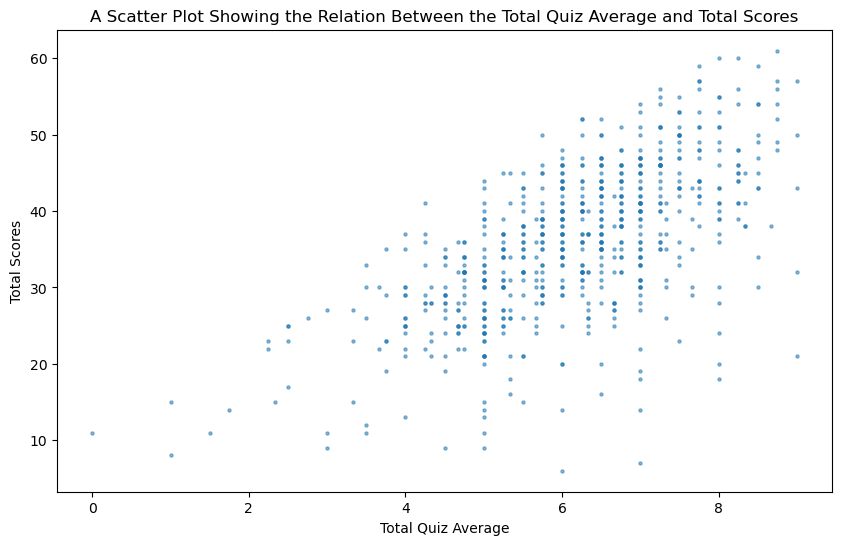

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Quiz_avg'], results_df['T_70'], s=5, alpha=0.5)
plt.xlabel('Total Quiz Average')
plt.ylabel('Total Scores')
plt.title('A Scatter Plot Showing the Relation Between the Total Quiz Average and Total Scores');

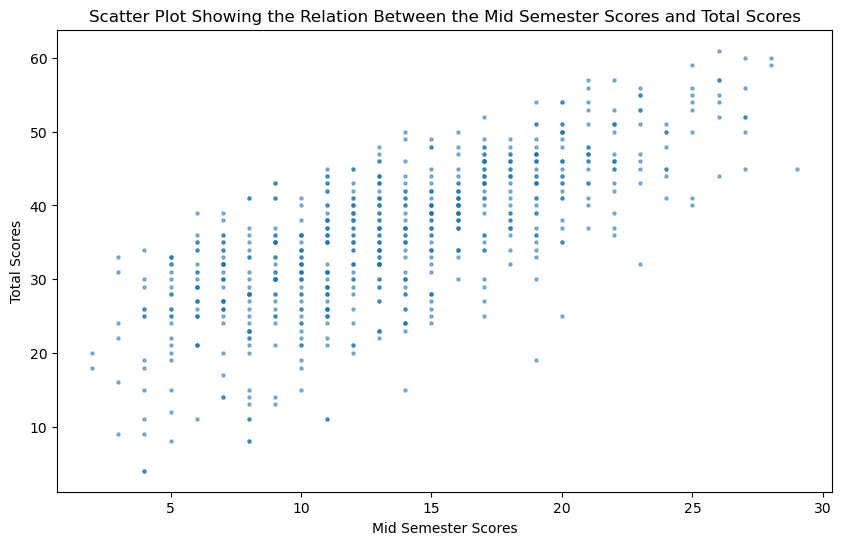

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['MS_30'], results_df['T_70'], s=5, alpha=0.5)
plt.title('Scatter Plot Showing the Relation Between the Mid Semester Scores and Total Scores')
plt.xlabel('Mid Semester Scores')
plt.ylabel('Total Scores');